# Titanic Survival Analytics

## import the data

In [2]:
#data analysis libraries 
import numpy as np
import pandas as pd
from pandas import Series,DataFrame

#visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
#read in the data
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [4]:
#show the data
train.sample(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
561,562,0,3,"Sivic, Mr. Husein",male,40.0,0,0,349251,7.8958,NaN,S
229,230,0,3,"Lefebre, Miss. Mathilde",female,NaN,3,1,4133,25.4667,NaN,S
91,92,0,3,"Andreasson, Mr. Paul Edvin",male,20.0,0,0,347466,7.8542,NaN,S
795,796,0,2,"Otter, Mr. Richard",male,39.0,0,0,28213,13.0000,NaN,S
587,588,1,1,"Frolicher-Stehli, Mr. Maxmillian",male,60.0,1,1,13567,79.2000,B41,C
116,117,0,3,"Connors, Mr. Patrick",male,70.5,0,0,370369,7.7500,NaN,Q
36,37,1,3,"Mamee, Mr. Hanna",male,NaN,0,0,2677,7.2292,NaN,C
169,170,0,3,"Ling, Mr. Lee",male,28.0,0,0,1601,56.4958,NaN,S
677,678,1,3,"Turja, Miss. Anna Sofia",female,18.0,0,0,4138,9.8417,NaN,S
29,30,0,3,"Todoroff, Mr. Lalio",male,NaN,0,0,349216,7.8958,NaN,S


## data exploration

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [6]:
#describe all attributions
train.describe(include="all")

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Hart, Miss. Eva Miriam",male,NaN,NaN,NaN,347082,NaN,G6,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


## data viz.

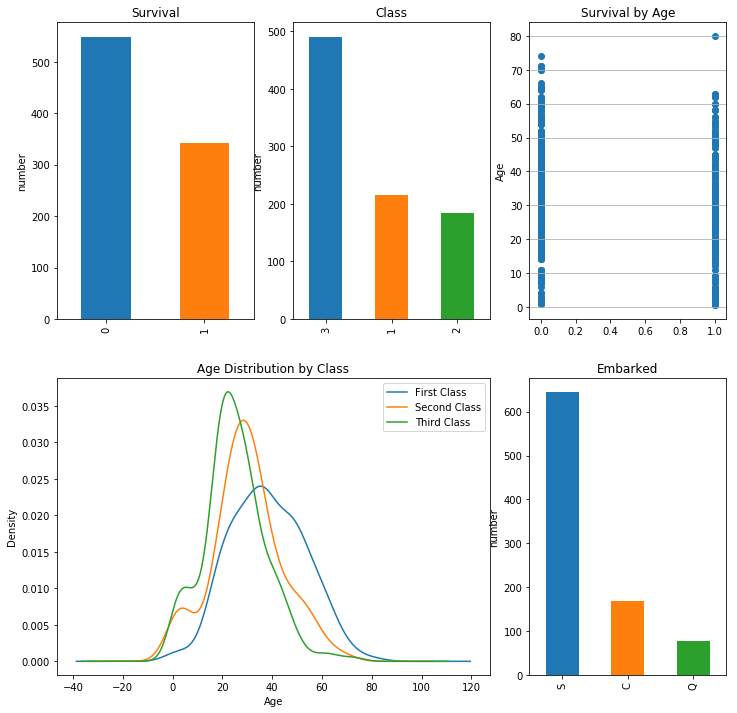

In [6]:
fig = plt.figure(figsize=(12,12))
fig.set(alpha=0.2) 

plt.subplot2grid((2,3),(0,0))           
train.Survived.value_counts().plot(kind='bar')
plt.title(u"Survival") 
plt.ylabel(u"number")  

plt.subplot2grid((2,3),(0,1))
train.Pclass.value_counts().plot(kind="bar")
plt.ylabel(u"number")
plt.title(u"Class")

plt.subplot2grid((2,3),(0,2))
plt.scatter(train.Survived, train.Age)
plt.ylabel(u"Age")                        
plt.grid(b=True, which='major', axis='y') 
plt.title(u"Survival by Age")


plt.subplot2grid((2,3),(1,0), colspan=2)
train.Age[train.Pclass == 1].plot(kind='kde')   
train.Age[train.Pclass == 2].plot(kind='kde')
train.Age[train.Pclass == 3].plot(kind='kde')
plt.xlabel(u"Age")# plots an axis lable
plt.ylabel(u"Density") 
plt.title(u"Age Distribution by Class")
plt.legend((u'First Class', u'Second Class',u'Third Class'),loc='best') # sets our legend for our graph.


plt.subplot2grid((2,3),(1,2))
train.Embarked.value_counts().plot(kind='bar')
plt.title(u"Embarked")
plt.ylabel(u"number")  
plt.show()

### survival w./ features

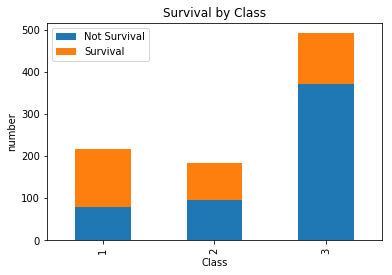

In [7]:
fig = plt.figure()
fig.set(alpha=0.2)  

Survived_0 = train.Pclass[train.Survived == 0].value_counts()
Survived_1 = train.Pclass[train.Survived == 1].value_counts()
df=pd.DataFrame({u'Survival':Survived_1, u'Not Survival':Survived_0})
df.plot(kind='bar', stacked=True)
plt.title(u"Survival by Class")
plt.xlabel(u"Class") 
plt.ylabel(u"number") 
plt.show()

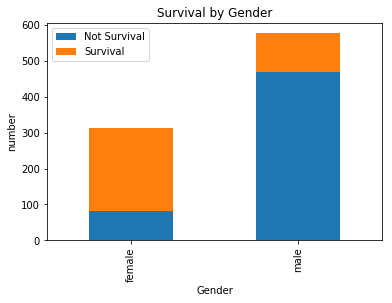

In [8]:
fig = plt.figure()
fig.set(alpha=0.2)  

Survived_0 = train.Sex[train.Survived == 0].value_counts()
Survived_1 = train.Sex[train.Survived == 1].value_counts()
df=pd.DataFrame({u'Survival':Survived_1, u'Not Survival':Survived_0})
df.plot(kind='bar', stacked=True)
plt.title(u"Survival by Gender")
plt.xlabel(u"Gender") 
plt.ylabel(u"number") 
plt.show()

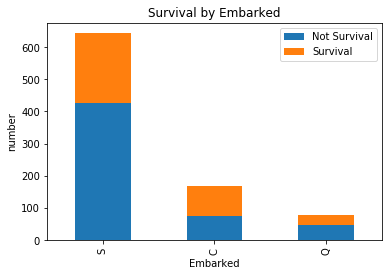

In [9]:
fig = plt.figure()
fig.set(alpha=0.2)  

Survived_0 = train.Embarked[train.Survived == 0].value_counts()
Survived_1 = train.Embarked[train.Survived == 1].value_counts()
df=pd.DataFrame({u'Survival':Survived_1, u'Not Survival':Survived_0})
df.plot(kind='bar', stacked=True)
plt.title(u"Survival by Embarked")
plt.xlabel(u"Embarked") 
plt.ylabel(u"number") 
plt.show()

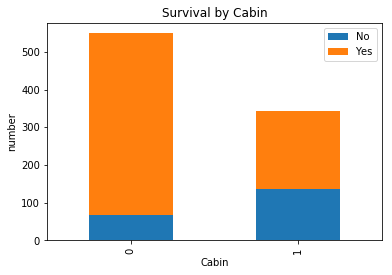

In [11]:
fig = plt.figure()
fig.set(alpha=0.2)  

Survived_0 = train.Survived[pd.notnull(train.Cabin)].value_counts()
Survived_1 = train.Survived[pd.isnull(train.Cabin)].value_counts()
df=pd.DataFrame({u'Yes':Survived_1, u'No':Survived_0})
df.plot(kind='bar', stacked=True)
plt.title(u"Survival by Cabin")
plt.xlabel(u"Cabin") 
plt.ylabel(u"number") 
plt.show()

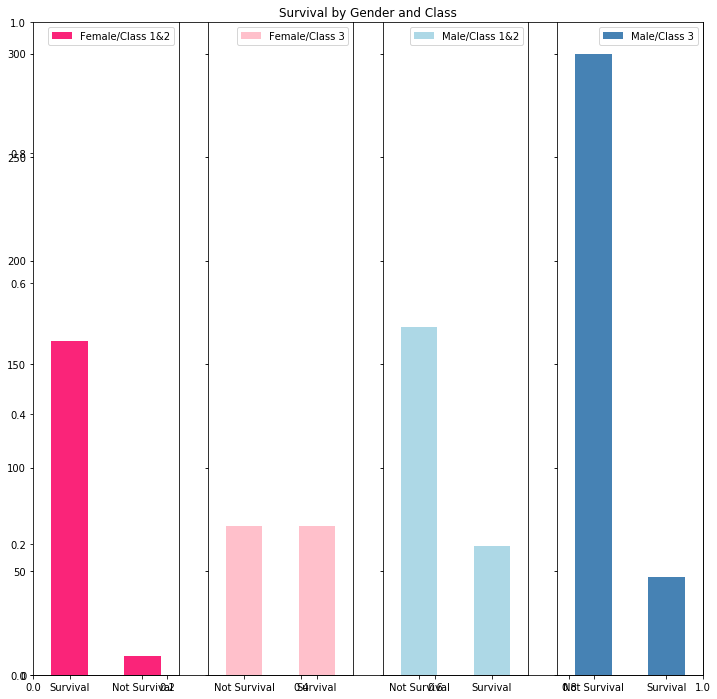

In [39]:
fig=plt.figure(figsize=(12,12))
fig.set(alpha=0.65) # 设置图像透明度，无所谓
plt.title(u"Survival by Gender and Class")

ax1=fig.add_subplot(141)
train.Survived[train.Sex == 'female'][train.Pclass != 3].value_counts().plot(kind='bar', label="F/Class 1&2", color='#FA2479')
ax1.set_xticklabels([u"Survival", u"Not Survival"], rotation=0)
ax1.legend([u"Female/Class 1&2"], loc='best')

ax2=fig.add_subplot(142, sharey=ax1)
train.Survived[train.Sex == 'female'][train.Pclass == 3].value_counts().plot(kind='bar', label="F/Class 3", color='pink')
ax2.set_xticklabels([u"Not Survival", u"Survival"], rotation=0)
plt.legend([u"Female/Class 3"], loc='best')

ax3=fig.add_subplot(143, sharey=ax1)
train.Survived[train.Sex == 'male'][train.Pclass != 3].value_counts().plot(kind='bar', label="M/Class 1&2",color='lightblue')
ax3.set_xticklabels([u"Not Survival", u"Survival"], rotation=0)
plt.legend([u"Male/Class 1&2"], loc='best')

ax4=fig.add_subplot(144, sharey=ax1)
train.Survived[train.Sex == 'male'][train.Pclass == 3].value_counts().plot(kind='bar', label="M/Class 3", color='steelblue')
ax4.set_xticklabels([u"Not Survival", u"Survival"], rotation=0)
plt.legend([u"Male/Class 3"], loc='best')

plt.show()

## Data Preprocessing

In [12]:
from sklearn.ensemble import RandomForestRegressor

### handle missing age value using RandomForestClassifier 
def set_missing_ages(df):
    age_df = df[['Age','Fare', 'Parch', 'SibSp', 'Pclass']]
    known_age = age_df[age_df.Age.notnull()].as_matrix()
    unknown_age = age_df[age_df.Age.isnull()].as_matrix()
    y = known_age[:, 0]
    X = known_age[:, 1:]
    rfr = RandomForestRegressor(random_state=0, n_estimators=2000, n_jobs=-1)
    rfr.fit(X, y)
    predictedAges = rfr.predict(unknown_age[:, 1::])
    df.loc[ (df.Age.isnull()), 'Age' ] = predictedAges 
    return df, rfr

def set_Cabin_type(df):
    df.loc[ (df.Cabin.notnull()), 'Cabin' ] = "Yes"
    df.loc[ (df.Cabin.isnull()), 'Cabin' ] = "No"
    return df

train, rfr = set_missing_ages(train)
train = set_Cabin_type(train)

In [15]:
# get dummy data
dummies_Cabin = pd.get_dummies(train['Cabin'], prefix= 'Cabin')

dummies_Embarked = pd.get_dummies(train['Embarked'], prefix= 'Embarked')

dummies_Sex = pd.get_dummies(train['Sex'], prefix= 'Sex')

dummies_Pclass = pd.get_dummies(train['Pclass'], prefix= 'Pclass')

df = pd.concat([train, dummies_Cabin, dummies_Embarked, dummies_Sex, dummies_Pclass], axis=1)
df.drop(['Pclass', 'Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], axis=1, inplace=True)
df.head()

,PassengerId,Survived,Age,SibSp,Parch,Fare,Cabin_No,Cabin_Yes,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male,Pclass_1,Pclass_2,Pclass_3
0,1,0,22.0,1,0,7.2500,1,0,0,0,1,0,1,0,0,1
1,2,1,38.0,1,0,71.2833,0,1,1,0,0,1,0,1,0,0
2,3,1,26.0,0,0,7.9250,1,0,0,0,1,1,0,0,0,1
3,4,1,35.0,1,0,53.1000,0,1,0,0,1,1,0,1,0,0
4,5,0,35.0,0,0,8.0500,1,0,0,0,1,0,1,0,0,1


In [29]:
# scaling 
import sklearn.preprocessing as preprocessing
scaler = preprocessing.StandardScaler()
age_scale_param = scaler.fit(df['Age'].values.reshape(-1,1))
df['Age_scaled'] = scaler.fit_transform(df['Age'].values.reshape(-1,1), age_scale_param)
fare_scale_param = scaler.fit(df['Fare'].values.reshape(-1,1))
df['Fare_scaled'] = scaler.fit_transform(df['Fare'].values.reshape(-1,1), fare_scale_param)
df.head()

,PassengerId,Survived,Age,SibSp,Parch,Fare,Cabin_No,Cabin_Yes,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male,Pclass_1,Pclass_2,Pclass_3,Age_scaled,Fare_scaled
0,1,0,22.0,1,0,7.2500,1,0,0,0,1,0,1,0,0,1,-0.561380,-0.502445
1,2,1,38.0,1,0,71.2833,0,1,1,0,0,1,0,1,0,0,0.613171,0.786845
2,3,1,26.0,0,0,7.9250,1,0,0,0,1,1,0,0,0,1,-0.267742,-0.488854
3,4,1,35.0,1,0,53.1000,0,1,0,0,1,1,0,1,0,0,0.392942,0.420730
4,5,0,35.0,0,0,8.0500,1,0,0,0,1,0,1,0,0,1,0.392942,-0.486337


## logistic regression modeling

In [37]:
from sklearn import linear_model
train_df = df.filter(regex='Survived|Age_.*|SibSp|Parch|Fare_.*|Cabin_.*|Embarked_.*|Sex_.*|Pclass_.*')
train_np = train_df.as_matrix()
y = train_np[:, 0]
X = train_np[:, 1:]
clf = linear_model.LogisticRegression(C=1.0, penalty='l1', tol=1e-6)
clf.fit(X, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=1e-06,
          verbose=0, warm_start=False)

## process test data

In [53]:
test = pd.read_csv("test.csv")
test.loc[ (test.Fare.isnull()), 'Fare' ] = 0
tmp_df = test[['Age','Fare', 'Parch', 'SibSp', 'Pclass']]
null_age = tmp_df[test.Age.isnull()].as_matrix()

X = null_age[:, 1:]
predictedAges = rfr.predict(X)
test.loc[ (test.Age.isnull()), 'Age' ] = predictedAges

test = set_Cabin_type(test)
dummies_Cabin = pd.get_dummies(test['Cabin'], prefix= 'Cabin')
dummies_Embarked = pd.get_dummies(test['Embarked'], prefix= 'Embarked')
dummies_Sex = pd.get_dummies(test['Sex'], prefix= 'Sex')
dummies_Pclass = pd.get_dummies(test['Pclass'], prefix= 'Pclass')


test = pd.concat([test, dummies_Cabin, dummies_Embarked, dummies_Sex, dummies_Pclass], axis=1)
test.drop(['Pclass', 'Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], axis=1, inplace=True)
test['Age_scaled'] = scaler.fit_transform(test['Age'].values.reshape(-1, 1), age_scale_param)
test['Fare_scaled'] = scaler.fit_transform(test['Fare'].values.reshape(-1, 1), fare_scale_param)
test.head()

,PassengerId,Age,SibSp,Parch,Fare,Cabin_No,Cabin_Yes,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male,Pclass_1,Pclass_2,Pclass_3,Age_scaled,Fare_scaled
0,892,34.5,0,0,7.8292,1,0,0,1,0,0,1,0,0,1,0.307521,-0.496637
1,893,47.0,1,0,7.0000,1,0,0,0,1,1,0,0,0,1,1.256241,-0.511497
2,894,62.0,0,0,9.6875,1,0,0,1,0,0,1,0,1,0,2.394706,-0.463335
3,895,27.0,0,0,8.6625,1,0,0,0,1,0,1,0,0,1,-0.261711,-0.481704
4,896,22.0,1,1,12.2875,1,0,0,0,1,1,0,0,0,1,-0.641199,-0.416740


# prediction and submission

In [68]:
test = test.filter(regex='Age_.*|SibSp|Parch|Fare_.*|Cabin_.*|Embarked_.*|Sex_.*|Pclass_.*')
predictions = clf.predict(test)
test2 = pd.read_csv("test.csv")

In [69]:
result = pd.DataFrame({'PassengerId':test2['PassengerId'].as_matrix(), 'Survived':predictions.astype(np.int32)})

In [70]:
result.to_csv("logistic_regression_predictions.csv", index=False)